# **CLASSIFICAÇÃO BASEADA EM APRENDIZAGEM SUPERVISIONADA**

Nesse exemplo, estou treinando um modelo de IA para que ele aprenda a identificar automaticamente as diferentes espécies de flores da base de dados "Iris". Os dados serão separados em dois conjuntos: teste e treinamento, para que possamos mapear a eficácia do treinamento, sendo desejável que, após o processo, o modelo seja capaz de classificar novas amostras de flores sem intervenção humana.



---



In [ ]:
# Importando o módulo "datasets" da biblioteca sklearn, e caregando o conjunto de dados da base íris

from sklearn import datasets
iris = datasets.load_iris()


In [77]:
# Armazenando os valores de entrada (iris.data) e de saída (iris.target) em variáveis
x_values = iris.data
y_values = iris.target

print("Entradas: \n", x_values)
print("\n Saídas: \n", y_values)


Entradas: 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]


In [78]:
# Importando função "train_test_split" para dividir os dados em conjunto de treinamento e teste. Isso é necessário para que
# possamos medir o desempenho do modelo ao entrar em contato com dados que ele não tem conhecimento prévio. Não queremos que ele
# decore, queremos que ele aprenda. Por isso, fazer essa comparação é fundamental para medir o nível de generalização do nosso modelo

from sklearn.model_selection import train_test_split


In [81]:
# Aqui, definimos que 30% dos dados irão compor o cojunto teste, e os demais irão compor o conjunto treinamento

x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.3, random_state=0)

#Verificando:

print("Tamanho total da base de dados = ",len(x_values))
print("Tamanho do conjunto de treinamento = ",len(x_train))
print("Tamanho do conjunto de testes = ",len(x_test))


Tamanho total da base de dados =  150
Tamanho do conjunto de treinamento =  105
Tamanho do conjunto de testes =  45


In [95]:
# Aqui importamos um perceptron, um tipo de rede neural simples. Usaremos ele para prosseguir com a classificação

from sklearn.linear_model import Perceptron


In [96]:
# Aqui instanciamos o perceptron e iniciamos o treinamento por meio do método fit(), onde é esperado que o algoritmo aprenda a
# correlacionar os dados de entrada (x_train) aos dados de saída (y_train)

perceptron = Perceptron(random_state = 0)
perceptron.fit(x_train, y_train)

Perceptron()



---



## **Iniciando as análises**
### - Acurácia, matriz de confusão e gráfico de dispersão





In [101]:

from sklearn.metrics import accuracy_score,confusion_matrix

# 1. Aqui é feita uma previsão com base no conjunto de treino
y_predicted_train = perceptron.predict(x_train)

# 2. Aqui calcularemos a acurácia (total de predições corretas feitas pelo modelo em relaçao ao total de predições).
accuracy_train = accuracy_score(y_train,y_predicted_train)

# 3. Aqui calcularemos a matriz de confusão (mostra o desempenho do modelo em acertos e erros para cada classe).
conf_matrix_train = confusion_matrix(y_train,y_predicted_train)

print("Métricas de Treinamento")
print("Acurácia = ",accuracy_train)
print("\nMatriz de Confusão")
print(conf_matrix_train)


Métricas de Treinamento
Acurácia =  0.8952380952380953

Matriz de Confusão
[[34  0  0]
 [ 7 21  4]
 [ 0  0 39]]


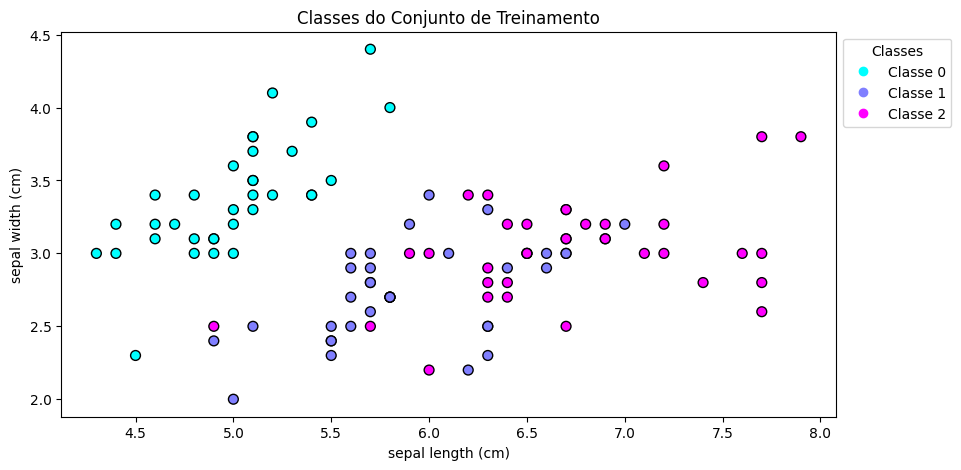

In [102]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# 1. Gráfico das classes do conjunto de treinamento
plt.figure(figsize=(10, 5))

# Criamos o gráfico utilizando os dados da coluna 0 e 1 ( X = "Ssepal length" [0] e Y = "Ssepal width" [1])
scatter = plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, edgecolor='k', s=50, cmap=plt.colormaps["cool"])

# Nomeamos cada eixo do gráfico
plt.title("Classes do Conjunto de Treinamento")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

# Legenda (capricho)
handles, labels = scatter.legend_elements()
plt.legend(handles, ['Classe 0', 'Classe 1', 'Classe 2'], title="Classes", loc='upper left', bbox_to_anchor=(1, 1))
plt.show()



---



In [103]:
# Aqui é feita uma previsão com base no conjunto de teste
y_predicted_test = perceptron.predict(x_test)

# Aqui calcularemos a acurácia (total de predições corretas feitas pelo modelo em relaçao ao total de predições).
accuracy_test = accuracy_score(y_test,y_predicted_test)

# Aqui calcularemos a matriz de confusão (mostra o desempenho do modelo em acertos e erros para cada classe).
conf_matrix_test = confusion_matrix(y_test,y_predicted_test)
print("Métricas de Teste")
print("Acurácia = ",accuracy_test)
print("\nMatriz de Confusão")
print(conf_matrix_test)

Métricas de Teste
Acurácia =  0.8

Matriz de Confusão
[[16  0  0]
 [ 2  9  7]
 [ 0  0 11]]


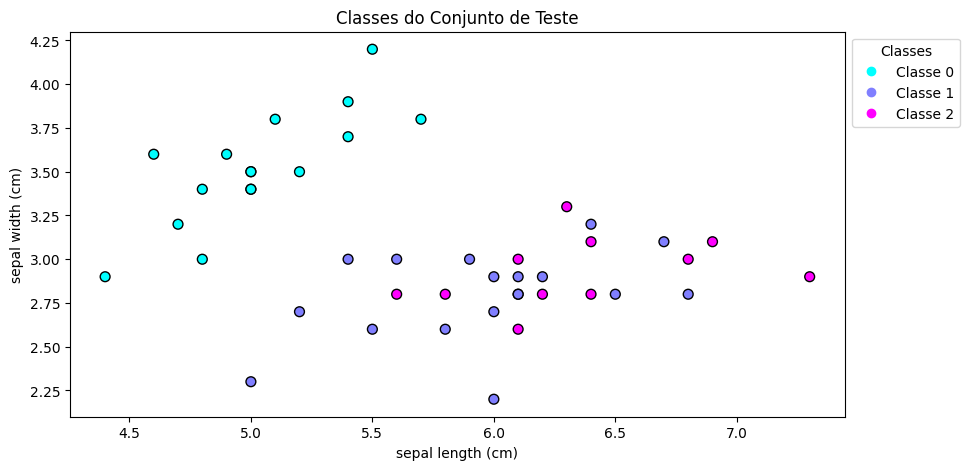

In [104]:
# 2. Gráfico das classes no conjunto de teste
plt.figure(figsize=(10, 5))

# Criamos o gráfico utilizando os dados da coluna 0 e 1 ( X = "Sepal length" [0] e Y = "Sepal width" [1])
scatter = plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, edgecolor='k', s=50, cmap=plt.colormaps["cool"])

# Nomeamos cada eixo do gráfico
plt.title("Classes do Conjunto de Teste")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

# Legenda (capricho)
handles, labels = scatter.legend_elements()
plt.legend(handles, ['Classe 0', 'Classe 1', 'Classe 2'], title="Classes", loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


# **Conclusão:**



_____________________________________________________________________________

**CONJUNTO TREINAMENTO:**

**Classe 0 (Iris-setosa)**: O modelo acertou 34 exemplos, sem nenhum erro.

**Classe 1 (Iris-versicolor)**: O modelo fez 7 erros, acertou 21 exemplos da classe 1 e fez 4 erros.

**Classe 2 (Iris-virginica)**: O modelo acertou 39 exemplos, sem nenhum erro.

_____________________________________________________________________________

**CONJUNTO TESTE:**

**Classe 0 (Iris-setosa)**: O modelo acertou 16 exemplos, sem nenhum erro.

**Classe 1 (Iris-versicolor)**: O modelo fez 2 erros, acertou 9 exemplos da classe 1 e fez 7 erros.

**Classe 2 (Iris-virginica)**: O modelo acertou 11 exemplos, sem nenhum erro.

_____________________________________________________________________________
**Ao análisar o gráfico de dispersão, a matriz de confusão e a acurácia, infere-se que:**


- Ao comparar a acurácia de treinamento com a acurácia de teste, o modelo não parece ter um overfitting, mesmo a acurária de teste (0.8) diferindo em aproximadamente 0.095 de percentual da acurácia de treinamento (0.895).
- A classe 1 (Iris-versicolor) parece ser a mais difícil para o modelo.
- Em conjunto de teste e treinamento, as previsões para as classes 0 (Iris-setosa) e 2 (Iris-virginica) estão melhores, com menos erros.
